# Merging raw data from crystal dataset


---


The aim of this script is to merge in a more confortable way the huge raw dataset available. In particular, for each crystal structure (we have 7 different crystal structure), the releated dataset will be loaded from a large-text-file. As output of this script we want a dataframe (X) which collect all the spectrum position (from 0 to 90, increasing by 0.02) and 7 different dataframe (one for each crystal structure), which collect the releated intensity with respect the X position in the spectrum. Moreover, in each Y dataset, we collect also the cell paramenters size, which will be used as target features in future task. Lastly, dataset will be saved.

## Import library

In [1]:
import os
from google.colab import drive

# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

## Create dataframes to store dataset 
---
For each dataset, script will produce two different dataframe in output as followed:
*   ***x_coord_dataset***, which is a dataframe of size 1-by-4501  with information about the x-coord of the spectrum. In particular, we store point in the following interval [0,90] increasing by 0.02;
*   ***y_coord_dataset***, which is a datframe of size num_obs-by-4502 storing information about the recordered intensity, releated to each point stored in x-coord-dataset, with also id-observation





### *Create dataframe to store the x-coordinates of the spectrum for each observation*

In [3]:
x_coord_dataset = pd.DataFrame(np.arange(0,90.02,0.02)).T
x_coord_dataset.columns = [f'x_{i}' for i in range(1,len(x_coord_dataset.T)+1)]   # Rename x_coord_dataset columns name
print('The x_coord_dataset has the following shape: ', x_coord_dataset.shape)     # Check the shape of x_coord_dataset
x_coord_dataset

The x_coord_dataset has the following shape:  (1, 4501)


,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_4492,x_4493,x_4494,x_4495,x_4496,x_4497,x_4498,x_4499,x_4500,x_4501
0,0.0,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,...,89.82,89.84,89.86,89.88,89.9,89.92,89.94,89.96,89.98,90.0


### *Create a dataframe to store the y-coordinates of the spectrum for each observation*

In [4]:
y_coord_dataset = pd.DataFrame(columns = [f'y_{i}' for i in range(1,4502)])
y_coord_dataset['ID_Observations'] = ''
y_coord_dataset

,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,...,y_4493,y_4494,y_4495,y_4496,y_4497,y_4498,y_4499,y_4500,y_4501,ID_Observations


### *Create dataframe to store additional information*

In [5]:
additional_information_dataset = pd.DataFrame(columns=['ID_Observations', 'a', 
                                                       'b', 'c', 'alpha', 'beta',
                                                       'gamma', 'Volume', 
                                                       'Crystal_Structure_Type'])
additional_information_dataset

,ID_Observations,a,b,c,alpha,beta,gamma,Volume,Crystal_Structure_Type


## Load the data


---


User must enter the name of the path in which dataset is stored. After that, we will check if the directory exists and if it is empty or not.

### *Check directory and files*

In [6]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Cnr-Project/Crystal-Dataset
path_name = !pwd
path_name = path_name[0]

/content/gdrive/MyDrive/Colab Notebooks/Cnr-Project/Crystal-Dataset


In [8]:
dir_list = ''

if not os.path.exists(path_name):
    print('Error! Invalid path selected.')
else:
    print(path_name + ' is a valid path.')

    if not os.listdir(path_name):
      print("Warning! Empty directory.")
    else:
      dir_list = os.listdir(path_name)

/content/gdrive/MyDrive/Colab Notebooks/Cnr-Project/Crystal-Dataset is a valid path.


In [9]:
dir_list

['alldatatype_Hexagonal']

### *Load the dataset using chunk*

In [10]:
chunksize = 150
k = 1
for file in dir_list:
  print('============================================================================')
  print('WORKING ON FILE NUMBER: {:d}'.format(k))

  i = 1

  with pd.read_csv(path_name + '/' + file, sep='|', header=None, index_col = None, 
                  names=["Spectrum_Data", "Cell_Parameters", "Volume", 
                          "ID_Observations", "Crystal_Structure_Type"], 
                  chunksize=chunksize, usecols = [0,1,2,3,4]) as reader:
                  for chunk in reader:
                    print('----------------------------------------------------------------------------')
                    print('Working of chunk number: {:d}'.format(i))
                    print('----------------------------------------------------------------------------')
                    print("DataType: {} \nShape: {} \nMemory: {}".format(type(chunk),
                                                chunk.shape, 
                                                chunk.memory_usage().sum()))
                    
                    # Retrive field for additional_information_dataset dataframe
                    chunk[['a', 'b', 'c', 'alpha', 'beta', 'gamma',]] = chunk.Cell_Parameters.str.split(' ', expand=True)
                    chunk.pop('Cell_Parameters')
                    additional_information_single_chunk = chunk[['ID_Observations', 
                                                                  'a', 'b', 'c', 
                                                                  'alpha', 'beta',
                                                                  'gamma', 'Volume',
                                                                  'Crystal_Structure_Type']]
                    additional_information_dataset = pd.concat([additional_information_dataset, 
                                                                additional_information_single_chunk], ignore_index= True)
                    
                    # Retrive and split specrtum field
                    xy_chunk = chunk['Spectrum_Data'].str.split(' ', expand=True)
                    x_y_chunk = pd.DataFrame()

                    j = 1
                    for col in xy_chunk.columns:
                      x_y_chunk[[f'x_{j}', f'y_{j}']] = xy_chunk[col].str.split(';', expand = True)
                      j = j + 1

                    # Drop column with name starting with 'x_'
                    x_y_chunk = x_y_chunk.loc[:, ~x_y_chunk.columns.str.contains('^x_')]
                                        
                    x_y_chunk['ID_Observations'] = chunk.ID_Observations

                    y_coord_dataset = pd.concat([y_coord_dataset, x_y_chunk], ignore_index= True)
                    
                    i = i + 1
  k = k + 1

WORKING ON FILE NUMBER: 1
----------------------------------------------------------------------------
Working of chunk number: 1
----------------------------------------------------------------------------
DataType: <class 'pandas.core.frame.DataFrame'> 
Shape: (150, 5) 
Memory: 6128
----------------------------------------------------------------------------
Working of chunk number: 2
----------------------------------------------------------------------------
DataType: <class 'pandas.core.frame.DataFrame'> 
Shape: (150, 5) 
Memory: 6132
----------------------------------------------------------------------------
Working of chunk number: 3
----------------------------------------------------------------------------
DataType: <class 'pandas.core.frame.DataFrame'> 
Shape: (150, 5) 
Memory: 6132
----------------------------------------------------------------------------
Working of chunk number: 4
----------------------------------------------------------------------------
DataType: <cl

In [11]:
additional_information_dataset=additional_information_dataset.set_index('ID_Observations')
y_coord_dataset=y_coord_dataset.set_index('ID_Observations')

In [12]:
print('x_coord_dataset shape: {}'.format(x_coord_dataset.shape))
print('x_coord_dataset data types: \n{}'.format(x_coord_dataset.dtypes))

x_coord_dataset shape: (1, 4501)
x_coord_dataset data types: 
x_1       float64
x_2       float64
x_3       float64
x_4       float64
x_5       float64
           ...   
x_4497    float64
x_4498    float64
x_4499    float64
x_4500    float64
x_4501    float64
Length: 4501, dtype: object


In [13]:
print('y_coord_dataset shape: {}'.format(y_coord_dataset.shape))
print('y_coord_dataset data types: \n{}'.format(y_coord_dataset.dtypes))

y_coord_dataset shape: (2543, 4501)
y_coord_dataset data types: 
y_1       object
y_2       object
y_3       object
y_4       object
y_5       object
           ...  
y_4497    object
y_4498    object
y_4499    object
y_4500    object
y_4501    object
Length: 4501, dtype: object


In [14]:
print('additional_information_dataset shape: {}'.format(additional_information_dataset.shape))
print('additional_information_dataset data types: \n{}'.format(additional_information_dataset.dtypes))

additional_information_dataset shape: (2543, 8)
additional_information_dataset data types: 
a                          object
b                          object
c                          object
alpha                      object
beta                       object
gamma                      object
Volume                    float64
Crystal_Structure_Type     object
dtype: object


## Basic checks

### *Casting of numeric field from object to float*

In [15]:
y_coord_dataset = y_coord_dataset.apply(pd.to_numeric)
print('y_coord_dataset data types after casting operation: \n{}'.format(y_coord_dataset.dtypes))

y_coord_dataset data types after casting operation: 
y_1       float64
y_2       float64
y_3       float64
y_4       float64
y_5       float64
           ...   
y_4497    float64
y_4498    float64
y_4499    float64
y_4500    float64
y_4501    float64
Length: 4501, dtype: object


In [16]:
index_name = additional_information_dataset.select_dtypes(include='object').columns
index_name = index_name.drop('Crystal_Structure_Type')
additional_information_dataset[index_name] = additional_information_dataset[index_name].apply(pd.to_numeric)
print('additional_information_dataset data types after casting operation: \n{}'.format(additional_information_dataset.dtypes))

additional_information_dataset data types after casting operation: 
a                         float64
b                         float64
c                         float64
alpha                     float64
beta                      float64
gamma                     float64
Volume                    float64
Crystal_Structure_Type     object
dtype: object


### *Merging additional_information_dataset and y_coord_dataset on ID_Observations*

In [17]:
y_coord_dataset = y_coord_dataset.join(additional_information_dataset)
print('y_coord_dataset shape: {}'.format(y_coord_dataset.shape))
print('y_coord_dataset data types: \n{}'.format(y_coord_dataset.dtypes))

y_coord_dataset shape: (2543, 4509)
y_coord_dataset data types: 
y_1                       float64
y_2                       float64
y_3                       float64
y_4                       float64
y_5                       float64
                           ...   
alpha                     float64
beta                      float64
gamma                     float64
Volume                    float64
Crystal_Structure_Type     object
Length: 4509, dtype: object


### *Check for ***null*** field*

Null field in y_coord_dataset: 
y_1                       False
y_2                       False
y_3                       False
y_4                       False
y_5                       False
                          ...  
alpha                     False
beta                      False
gamma                     False
Volume                    False
Crystal_Structure_Type    False
Length: 4509, dtype: bool


<Axes: ylabel='ID_Observations'>

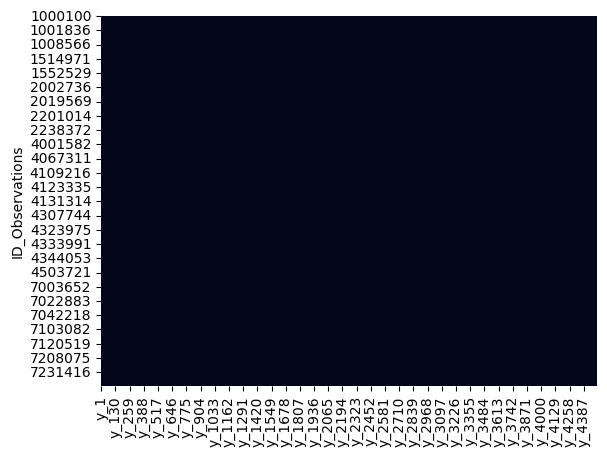

In [18]:
print('Null field in y_coord_dataset: \n{}'.format(y_coord_dataset.isnull().any()))
sns.heatmap(y_coord_dataset.isnull(), cbar=False)

### *Check for NaN rows and drop it*

In [19]:
n_samples = y_coord_dataset.shape[0]
y_coord_dataset = y_coord_dataset.dropna()   
print('Number of NaN rows dropped: {}/{} ({:.2f}%)'.format(n_samples - y_coord_dataset.shape[0], n_samples, (n_samples - y_coord_dataset.shape[0]) / n_samples * 100))

Number of NaN rows dropped: 0/2543 (0.00%)


### *Check for duplicate rows and drop, if exists*

In [20]:
duplicated_rows = y_coord_dataset[y_coord_dataset.duplicated()]
n_samples = y_coord_dataset.shape[0]  
duplicates = n_samples - y_coord_dataset.shape[0]

if not duplicated_rows.empty:
  y_coord_dataset.drop_duplicates(ignore_index=False, inplace=True)
  print('Number of canceled duplicates: {}/{} ({:.2f}%)'.format(duplicates, n_samples, duplicates / n_samples * 100))
else:
  print('Number of canceled duplicates: {}/{} ({:.2f}%)'.format(duplicates, n_samples, duplicates / n_samples * 100))

Number of canceled duplicates: 0/2543 (0.00%)


## Show dataset content

In [21]:
print('x_coord_dataset content: ')
x_coord_dataset

x_coord_dataset content: 


,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_4492,x_4493,x_4494,x_4495,x_4496,x_4497,x_4498,x_4499,x_4500,x_4501
0,0.0,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,...,89.82,89.84,89.86,89.88,89.9,89.92,89.94,89.96,89.98,90.0


In [22]:
print('y_coord_dataset content: ')
y_coord_dataset

y_coord_dataset content: 


,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,...,y_4500,y_4501,a,b,c,alpha,beta,gamma,Volume,Crystal_Structure_Type
ID_Observations,,,,,,,,,,,,,,,,,,,,,
1000100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,9.3200,9.3200,3.9618,90.0,90.0,120.0,298.027,Hexagonal
1000115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001,0.001,12.8720,12.8720,4.9772,90.0,90.0,120.0,714.180,Hexagonal
1000134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.811,3.183,10.1760,10.1760,8.4121,90.0,90.0,120.0,754.378,Hexagonal
1000155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,5.4090,5.4090,8.6000,90.0,90.0,120.0,217.903,Hexagonal
1000156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,5.4090,5.4090,8.6000,90.0,90.0,120.0,217.903,Hexagonal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8103008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.361,12.473,8.7199,8.7199,5.3564,90.0,90.0,120.0,352.717,Hexagonal
8103058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.042,0.037,4.9935,4.9935,8.0713,90.0,90.0,120.0,174.295,Hexagonal
8103181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.214,0.133,12.2812,12.2812,18.7740,90.0,90.0,120.0,2452.274,Hexagonal


## Saving the new dataset

In [23]:
def save_dataset(dataset):
  save_data = input('Do you want to save x_coord_dataset [y|n]: ')
  if save_data.lower() == 'y':
    path_dataset = input('Enter path in which to store dataset: ')
    name_dataset = input('Enter dataset name you want to save: ')
    valid_dataset_path = '/content/' + path_dataset

    if os.path.exists(valid_dataset_path):
      complete_path = valid_dataset_path + '/' + name_dataset + '.csv'
      dataset.to_csv(complete_path, sep=';', index=True, header=True)
      print('Dataset stored in : ',complete_path)
    else:
      print('Error! Invalid name of dataset or Not uploaded dataset has been requested.\n'
            +'Please, enter a valid dataset name to continue.')
  elif save_data.lower() == 'n':
    print('Dataset will NOT be saved!')

### *Saving x_coord_dataset*

In [24]:
save_dataset(x_coord_dataset)

Do you want to save x_coord_dataset [y|n]: n
Dataset will NOT be saved!


### *Saving y_coord_dataset*

In [25]:
save_dataset(y_coord_dataset)

Do you want to save x_coord_dataset [y|n]: n
Dataset will NOT be saved!
